In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-44.89642781278108 68.01371391147899
-82.87528783507402 156.59836990203098
60.52733878244743 -103.91003167292529
-39.8811622246142 -81.54042501076783
37.13475197096173 -17.283196190287782
-83.76716982151355 -96.05103800657272
71.47245410180307 94.24104008229921
73.36013438980711 -3.7928891694413664
-85.7388527653331 99.76997441317906
30.60383220274518 -111.41955188426516
19.642196262778015 165.7633067400427
89.26460252221608 130.76746582830867
-86.63663635189948 2.5193982363542204
-76.97874806925603 2.010380229244788
-76.24484945866556 -9.499826513052085
-36.97364049243518 -11.586161289881403
-67.18797124925001 176.90194282617927
-33.80517978031496 66.83881021543857
-49.17987472255643 66.71865663086979
10.135283026133465 -123.12145579943967
-79.18849706011548 115.09784134758081
3.4192219687456458 -127.58388208124941
-35.372595524689956 25.105681946556672
69.07524354873544 73.35297307607311
30.75956521496626 157.38768670289494
-86.98316985489934 -125.63414489863192
83.75838183706824 -15

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
#import the requests library.
import requests

#import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 75.38,
  'feels_like': 76.42,
  'temp_min': 72.55,
  'temp_max': 80.55,
  'pressure': 1011,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 270},
 'clouds': {'all': 75},
 'dt': 1658800978,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1658741380,
  'sunset': 1658794293},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data['sys']['country']

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.55 81 75 8.05


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 26, 2, 2, 58)

In [17]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-26 02:02:58'

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | camacha
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | santa ana
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | yar-sale
Processing Record 22 of Set 1 | sentyabrskiy
City not found. Skipping...
Pr

Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | russell
Processing Record 40 of Set 4 | nuh
Processing Record 41 of Set 4 | devils lake
Processing Record 42 of Set 4 | uvalde
Processing Record 43 of Set 4 | khuzhir
Processing Record 44 of Set 4 | andarab
City not found. Skipping...
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | mazarron
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | mokolo
Processing Record 49 of Set 4 | ledyard
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | qui nhon
Processing Record 2 of Set 5 | mayo
Processing Record 3 of Set 5 | port hedland
Processing Record 4 of Set 5 | chilca
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | alta floresta
Processing Record 7 of Set 5 | puerto ayora
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | denpasar
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | aykhal

Processing Record 27 of Set 8 | sosnovo-ozerskoye
Processing Record 28 of Set 8 | avare
Processing Record 29 of Set 8 | saint-pierre
Processing Record 30 of Set 8 | punta gorda
Processing Record 31 of Set 8 | kushima
Processing Record 32 of Set 8 | krasnaya gorbatka
Processing Record 33 of Set 8 | andenes
Processing Record 34 of Set 8 | kurilsk
Processing Record 35 of Set 8 | sovetskiy
Processing Record 36 of Set 8 | klyuchi
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | namatanai
Processing Record 39 of Set 8 | half moon bay
Processing Record 40 of Set 8 | mayumba
Processing Record 41 of Set 8 | urumqi
Processing Record 42 of Set 8 | khandyga
Processing Record 43 of Set 8 | nikolskoye
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | kilindoni
Processing Record 46 of Set 8 | munirabad
Processing Record 47 of Set 8 | andapa
Processing Record 48 of Set 8 | anhee
Processing Record 49 of Set 8 | natalio
Processing Record 50 of Set 8 | halal

Processing Record 11 of Set 12 | hudson bay
Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | alofi
Processing Record 14 of Set 12 | luanda
Processing Record 15 of Set 12 | novovasylivka
Processing Record 16 of Set 12 | poopo
Processing Record 17 of Set 12 | sangueya
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | aksu
Processing Record 20 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 21 of Set 12 | yelizovo
Processing Record 22 of Set 12 | galesong
Processing Record 23 of Set 12 | bathsheba
Processing Record 24 of Set 12 | turukhansk
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | maneadero
Processing Record 28 of Set 12 | manaure
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | suez
Processing Record 31 of Set 12 | codrington
Processing Record 32 of Set 12 | dromolaxia
Processing Record 33 of Set 12 | rodrigues 

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,64.22,83,59,11.41,RE,2022-07-26 02:07:52
1,Bluff,-46.6000,168.3333,46.80,89,100,27.04,NZ,2022-07-26 02:04:34
2,La Ronge,55.1001,-105.2842,63.09,55,90,3.31,CA,2022-07-26 02:03:48
3,Ancud,-41.8697,-73.8203,47.61,94,100,8.25,CL,2022-07-26 02:07:53
4,Camacha,33.0833,-16.3333,67.42,94,40,17.27,PT,2022-07-26 02:07:53
5,Punta Arenas,-53.1500,-70.9167,32.11,74,20,10.36,CL,2022-07-26 02:07:53
6,Talnakh,69.4865,88.3972,61.21,57,31,7.18,RU,2022-07-26 02:07:54
7,Klaksvik,62.2266,-6.5890,47.32,84,40,9.19,FO,2022-07-26 02:06:13
8,Albany,42.6001,-73.9662,71.37,64,0,8.52,US,2022-07-26 02:06:31
9,Santa Ana,33.7456,-117.8678,88.41,73,40,11.50,US,2022-07-26 02:05:40


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-07-26 02:07:52,-21.3585,55.7679,64.22,83,59,11.41
1,Bluff,NZ,2022-07-26 02:04:34,-46.6000,168.3333,46.80,89,100,27.04
2,La Ronge,CA,2022-07-26 02:03:48,55.1001,-105.2842,63.09,55,90,3.31
3,Ancud,CL,2022-07-26 02:07:53,-41.8697,-73.8203,47.61,94,100,8.25
4,Camacha,PT,2022-07-26 02:07:53,33.0833,-16.3333,67.42,94,40,17.27


In [22]:
# Create the output file (csv).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658801454.761329

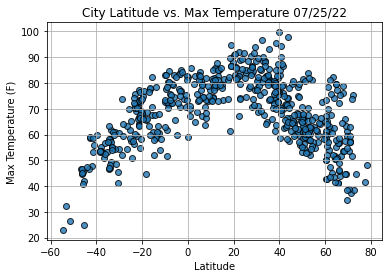

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

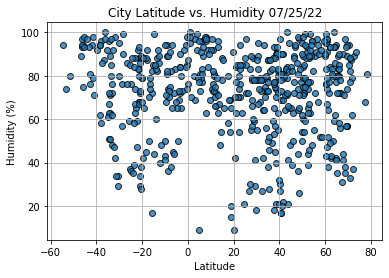

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

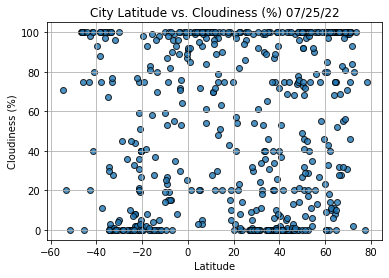

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

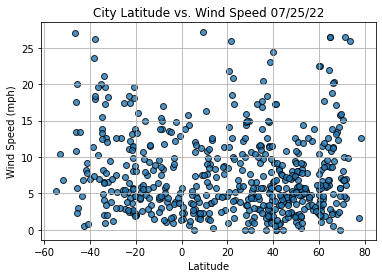

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-07-26 02:07:37
Lat                      -33.9258
Lng                       18.4232
Max Temp                    58.37
Humidity                       63
Cloudiness                      1
Wind Speed                   4.09
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,La Ronge,CA,2022-07-26 02:03:48,55.1001,-105.2842,63.09,55,90,3.31
4,Camacha,PT,2022-07-26 02:07:53,33.0833,-16.3333,67.42,94,40,17.27
6,Talnakh,RU,2022-07-26 02:07:54,69.4865,88.3972,61.21,57,31,7.18
7,Klaksvik,FO,2022-07-26 02:06:13,62.2266,-6.5890,47.32,84,40,9.19
8,Albany,US,2022-07-26 02:06:31,42.6001,-73.9662,71.37,64,0,8.52


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

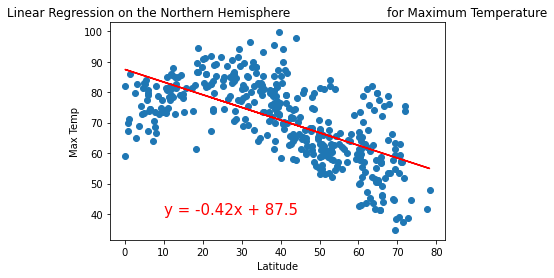

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

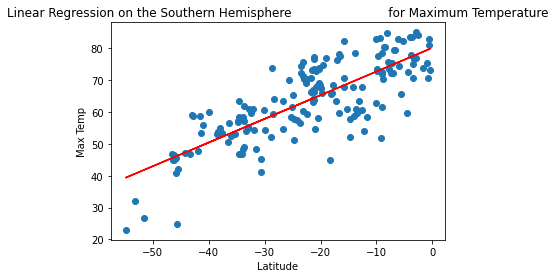

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

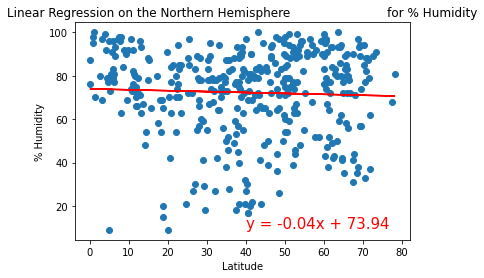

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

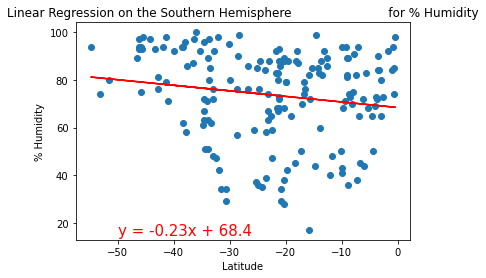

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

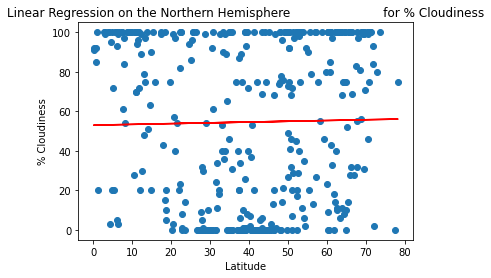

In [37]:
# Linear regression on the Northern Hemisphere and % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

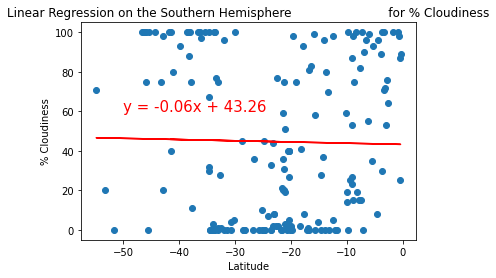

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

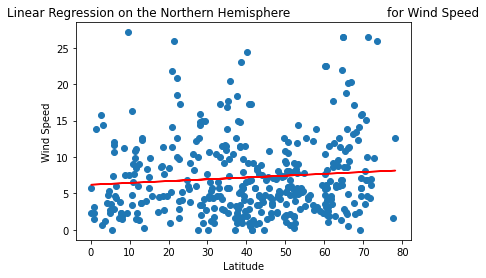

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,40))

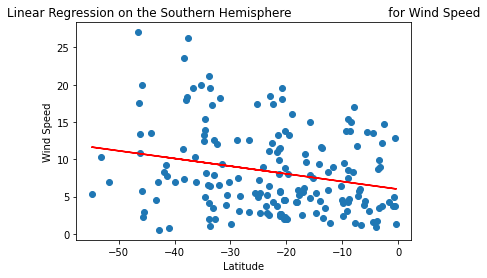

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))